# Mastermind

The game is played using:

- a decoding board, with a shield at one end covering a row of four large holes, and twelve (or ten, or eight, or six) additional rows containing four large holes next to a set of four small holes;
- code pegs of six different colors (or more; see Variations below), with round heads, which will be placed in the large holes on the board; and
- key pegs, some colored black, some white, which are flat-headed and smaller than the code pegs; they will be placed in the small holes on the board.

## Knuth

- [stack discussion ](https://stackoverflow.com/questions/53826287/donald-knuth-algorithm-for-mastermind-can-we-do-better)[Knuth's paper](https://www.cs.uni.edu/~wallingf/teaching/cs3530/resources/knuth-mastermind.pdf)

- [Knuth's paper](https://www.cs.uni.edu/~wallingf/teaching/cs3530/resources/knuth-mastermind.pdf) 

### Worst case: Five-guess algorithm

In 1977, Donald Knuth demonstrated that the codebreaker can solve the pattern in five moves or fewer, using an algorithm that progressively reduces the number of possible patterns. The algorithm works as follows:

1. Create the set S of 1296 possible codes (1111, 1112 ... 6665, 6666)
2. Start with initial guess 1122 (Knuth gives examples showing that this algorithm using other first guesses such as 1123, 1234 does not win in five tries on every code)
3. Play the guess to get a response of coloured and white pegs.
4. If the response is four colored pegs, the game is won, the algorithm terminates.
5. Otherwise, remove from S any code that would not give the same response if it (the guess) were the code.
6. Apply minimax technique to find a next guess as follows: For each possible guess, that is, any unused code of the 1296 not just those in S, calculate how many possibilities in S would be eliminated for each possible colored/white peg score. The score of a guess is the minimum number of possibilities it might eliminate from S. A single pass through S for each unused code of the 1296 will provide a hit count for each coloured/white peg score found; the coloured/white peg score with the highest hit count will eliminate the fewest possibilities; calculate the score of a guess by using "minimum eliminated" = "count of elements in S" - (minus) "highest hit count". From the set of guesses with the maximum score, select one as the next guess, choosing a member of S whenever possible. (Knuth follows the convention of choosing the guess with the least numeric value e.g. 2345 is lower than 3456. Knuth also gives an example showing that in some cases no member of S will be among the highest scoring guesses and thus the guess cannot win on the next turn, yet will be necessary to assure a win in five.)
7. Repeat from step 3.

---

### Comments 

- His original algorithm gave 5801 (average of 5801/1296 ≈ 4.47608), and the minor improvement gives 5800 (≈ 4.4753).

- Robert W. Irving, “Towards an optimum Mastermind strategy,” Journal of Recreational Mathematics 11 (1978), 81-87 [while staying within the “at most 5” achieves 5664 ⇒ ≈4.37]

- E. Neuwirth, “Some strategies for Mastermind,” Zeitschrift fur Operations Research 26 (1982), B257-B278 [achieves 5658 ⇒ ≈4.3657]

- Kenji Koyama and Tony W. Lai, “An optimal Mastermind strategy,” Journal of Recreational Mathematics 25 (1993), 251-256 [achieves 5626 ⇒ ≈4.34104938]





---


## Knuth's algorithm

- I'm going to program this but without the minimax step
- I'll just pick the next guess at random from the allowable ones

---


## Structure of program

There are 2 main  steps:

1. Initialize a game
2. Do a loop until the code is found


In [1]:
import string
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [20]:
def score(g,t):
    
    xs = ['']*6
    for i,c in enumerate(t):
        if g[i] != c: continue
        xs[i] = '_'
        
    for i,c in enumerate(g):
        if xs[i] == '_': continue
        if c in t:
            xs[i] = '*'
        else:
            xs[i] = 'x'
    return xs

r = requests.get(url='https://www.powerlanguage.co.uk/wordle/main.c1506a22.js')

In [151]:
import requests, re

r = requests.get(url='https://www.nytimes.com/games/wordle/main.bfba912f.js')
pp = re.compile('Ma=.*?\[(.*?)\]',re.DOTALL)
words = pp.search(r.text).group(1)
guesses = words.replace('"','').split(',')
print(', '.join(guesses[:10]))



cigar, rebut, sissy, humph, awake, blush, focal, evade, naval, serve


In [253]:
with open('ny_wordle.txt','w') as fp:
    fp.write(', '.join(guesses[:10]) )

In [49]:
r = requests.get(url='https://www.solitaire-play.com/lemot/lemot.min.js')
pp = re.compile('=.*?\[(.*?)\]',re.DOTALL)
words = pp.findall(r.text)
words = [x for x in words if len(x) > 10000]
guesses = words[0].lower().replace('"','').split(',')


In [146]:
r = requests.get(url = 'https://sweardle.glitch.me/swears.txt')

In [28]:
guesses = r.text.lower().split('\n')

In [33]:
import string

def m_score(w):  
    return sum([freqs[c] for c in set(w)])

txt = ' '.join(guesses).lower()

uu = [(x,txt.count(x)) for x in string.ascii_lowercase]
uu.sort(key=lambda x:x[1])

freqs = {x:i for i,x in enumerate(list(zip(*uu))[0])}

In [110]:
guesses[10]

'10099'

In [109]:
P = [ x for x in primes(10**5) if x > 10**4 ]
guesses = [ str(x) for x in P]

In [157]:
sorted([(-m_score(w),w) for w in guesses ])[:10]

[(-113, 'alert'),
 (-113, 'alter'),
 (-113, 'later'),
 (-112, 'arose'),
 (-112, 'irate'),
 (-111, 'stare'),
 (-109, 'arise'),
 (-109, 'atone'),
 (-109, 'cater'),
 (-109, 'crate')]

In [158]:
sub = ''
nsub = ''
forbidden = ['' for k in range(5)]


In [161]:
tt = ' '.join(guesses)


guess = '83269'

guess = 'slane'
mm = 'xxx*_'
guess = 'unite'
mm = 'x**x_'



ss  = list(zip(guess, mm))
sub += ''.join([x for x,y in ss if y == '*' and x not in sub])
nsub += ''.join([x for x,y in ss if y == 'x' ])

if nsub:
    #fails if the guess is an anagram 
    tt = re.sub(r'[{}]'.format(nsub),'',tt)
tt = [w for w in tt.split() if len(w) == len(guesses[0])]

tt = [w for w in tt if all( x in w for x in sub )]

chks1 = [i for i,y in enumerate(mm) if y == '_']
for i in chks1:
    tt = [w for w in tt if w[i] == guess[i]]
    
#I had to fix this to have memory
#and not be stateless

for i,y in enumerate(mm):
    if y == '*':
        forbidden[i] += guess[i]
        
for i,x in enumerate(forbidden):
    if not forbidden[i]: continue
    tt = [w for w in tt if w[i] not in forbidden[i]]


In [ ]:
*2467

In [147]:
tt

['38377', '38557', '58337', '58537', '78307']

In [162]:
sorted([(-m_score(w),w) for w in tt ])[:10]

[(-89, 'niche'),
 (-87, 'mince'),
 (-82, 'hinge'),
 (-82, 'wince'),
 (-78, 'binge'),
 (-77, 'niece'),
 (-70, 'genie')]

In [42]:
guesses.sort()

In [47]:
prefix = set( x[:3] for x in guesses  )

In [49]:
from collections import Counter

In [55]:
pre_count  = Counter( [ x[:3] for x in guesses ] )
post_count = Counter( [ x[-3:] for x in guesses ] )

In [58]:
ww,nn  = list(zip(*  pre_count.most_common(10) ))

In [64]:
for x in ww[:10]:
    print(x, [ w for w in guesses if w[:3] == x ] )

sta ['stack', 'staff', 'stage', 'staid', 'stain', 'stair', 'stake', 'stale', 'stalk', 'stall', 'stamp', 'stand', 'stank', 'stare', 'stark', 'start', 'stash', 'state', 'stave']
sha ['shack', 'shade', 'shady', 'shaft', 'shake', 'shaky', 'shale', 'shall', 'shalt', 'shame', 'shank', 'shape', 'shard', 'share', 'shark', 'sharp', 'shave', 'shawl']
sto ['stock', 'stoic', 'stoke', 'stole', 'stomp', 'stone', 'stony', 'stood', 'stool', 'stoop', 'store', 'stork', 'storm', 'story', 'stout', 'stove']
gra ['grace', 'grade', 'graft', 'grail', 'grain', 'grand', 'grant', 'grape', 'graph', 'grasp', 'grass', 'grate', 'grave', 'gravy', 'graze']
cha ['chafe', 'chaff', 'chain', 'chair', 'chalk', 'champ', 'chant', 'chaos', 'chard', 'charm', 'chart', 'chase', 'chasm']
cra ['crack', 'craft', 'cramp', 'crane', 'crank', 'crash', 'crass', 'crate', 'crave', 'crawl', 'craze', 'crazy']
sho ['shoal', 'shock', 'shone', 'shook', 'shoot', 'shore', 'shorn', 'short', 'shout', 'shove', 'shown', 'showy']
spi ['spice', 'spicy

In [57]:
post_count.most_common(10)

[('ing', 23),
 ('lly', 22),
 ('tch', 18),
 ('ter', 16),
 ('ack', 15),
 ('tty', 14),
 ('ver', 14),
 ('ash', 13),
 ('rry', 13),
 ('unt', 13)]

In [44]:
import numpy as np

def primes(n):
    """ Returns  array of primes, 2 <= p < n """
    sieve = np.ones(n, dtype= bool)
    sieve[::2] = False
    for i in range(3, int(np.sqrt(n))+1, 2):
        if sieve[i]:
            sieve[i*i::i] = False
    return np.nonzero(sieve)[0][1:]

P = [ x for x in primes(10**5) if x > 10**4 ]
guesses = [ str(x) for x in P]

In [184]:
P = [ x for x in primes(10**5) if x > 10**4 ]

In [185]:
guesses = [ str(x) for x in P]
xx = ''.join(guesses)
pp = Counter([x for x in xx])

In [186]:
pp.most_common()

[('1', 5672),
 ('3', 5552),
 ('7', 5520),
 ('9', 5484),
 ('2', 3515),
 ('5', 3456),
 ('4', 3412),
 ('6', 3372),
 ('8', 3339),
 ('0', 2493)]

In [201]:
ss = [ (x, set(y for y in x )) for x in guesses ] 


In [221]:
from collections import defaultdict

d = defaultdict(list)
for k, v in zip(d1, guesses):
    d[k].append(v)

In [243]:
' '.join(d['3679'])

'33679 33769 33967 36697 36739 36779 36793 36973 36979 36997 37369 37693 37699 37963 37967 39367 39667 39679 39769 63397 63697 63793 63799 63977 63997 66739 66973 67339 67369 67399 67933 67939 67993 69337 69379 69737 69739 69763 73369 73679 73693 73699 76369 76379 76963 77369 79367 79633 79693 93637 93763 93967 96337 96377 96737 96739 96763 96973 97367 97369 97673 99367'

In [220]:
dd = [list(x[1]) for x in ss if len(x[1]) == 5]
dd =  [list(x[1]) for x in ss]
d1 = [ ''.join(sorted(x)) for x in dd]

In [241]:
uu = Counter(d1)
uu.most_common()[:10]

[('3679', 62),
 ('1579', 55),
 ('1257', 54),
 ('2369', 54),
 ('139', 52),
 ('1479', 51),
 ('1357', 51),
 ('1347', 50),
 ('1378', 50),
 ('0139', 49)]

In [234]:
vv.most_common(40)

[('3679', 62),
 ('1579', 55),
 ('1257', 54),
 ('2369', 54),
 ('139', 52),
 ('1479', 51),
 ('1357', 51),
 ('1347', 50),
 ('1378', 50),
 ('0139', 49),
 ('1369', 49),
 ('1237', 47),
 ('1379', 47),
 ('3469', 45),
 ('379', 45),
 ('1789', 43),
 ('147', 41),
 ('0379', 41),
 ('3569', 41),
 ('1578', 40),
 ('1234', 39),
 ('1279', 39),
 ('13789', 39),
 ('3457', 38),
 ('3689', 38),
 ('13459', 37),
 ('1358', 37),
 ('2378', 37),
 ('1278', 36),
 ('1359', 36),
 ('12379', 36),
 ('1459', 35),
 ('1567', 35),
 ('0367', 35),
 ('3478', 35),
 ('389', 35),
 ('1467', 34),
 ('1345', 34),
 ('13579', 34),
 ('239', 34)]

In [1018]:
data = []

for k, target in enumerate(guesses):
    guess = 'alter'
    sub = ''
    nsub = ''
    #target = guesses[k]
    for j in range(10):

        tt = ' '.join(guesses)

        mm = score(guess, target)[:len(target)]
        ss  = list(zip(guess, mm))
            
        sub += ''.join([x for x,y in ss if y == '*' and x not in sub])
        nsub += ''.join([x for x,y in ss if y == 'x' ])
        if nsub :
            #fails if the guess is an anagram 
            tt = re.sub(r'[{}]'.format(nsub),'',tt)

        tt = [w for w in tt.split() if len(w) == len(guesses[0])]

        tt = [w for w in tt if all( x in w for x in sub )]

        chks1 = [i for i,y in enumerate(mm) if y == '_']
        for i in chks1:
            tt = [w for w in tt if w[i] == guess[i]]

        chks2 = [i for i,y in enumerate(mm) if y == '*']
        for i in chks2:
            tt = [w for w in tt if w[i] != guess[i]]
            
        if guess == target: 
            data.append((guess,j))
            break
        if j == 0: 
            guess = 'noisy' 
            continue
            
        if len(tt) > 10:
            guess = sorted([(-m_score(w),w) for w in tt])[0][1]
        else:
            guess = tt[0]
            

In [1001]:
ff_2guess = ff[:]

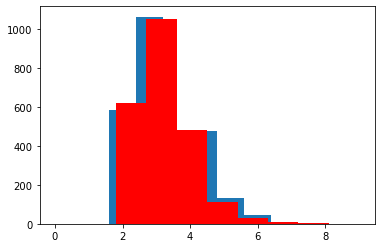

In [1021]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(ff, bins = 10);

plt.hist(ff_2guess, bins = 10,color='r');


In [1019]:
ww, ff = list(zip(*data))

In [943]:
from collections import Counter

In [1010]:
Counter(ff), Counter(ff_2guess)

(Counter({3: 1034,
          2: 582,
          4: 511,
          5: 129,
          6: 39,
          1: 1,
          7: 11,
          0: 1,
          8: 3,
          9: 1}),
 Counter({2: 620,
          3: 1048,
          5: 112,
          4: 483,
          1: 1,
          6: 32,
          7: 10,
          0: 1,
          8: 3,
          9: 1}))

In [977]:
ff_alter_a = ff[:]

In [1022]:
import requests
r = requests.get(url='https://www.powerlanguage.co.uk/wordle/main.c1506a22.js')
pp = re.compile('La=.*?\[(.*?)\]',re.DOTALL)
words = pp.search(r.text).group(1)
words = words.replace('"','').split(',')

In [170]:
import json
with open('word_list.json','w') as fp:
    json.dump(words,fp)

In [152]:
tt = ' '.join(words)
tt = re.sub(r'[oughtrzybls]','',tt)
tt = [w for w in tt.split() if len(w) == 5]
tt = [w for w in tt if all( x in w for x in 'cap' ) ]
tt

['panic', 'pecan', 'peace']

In [93]:
with open('/usr/share/dict/american-english') as fp:
    words = fp.read()
    
words = re.sub(r'[^\w\s]','', words)
tt = [w for w in  words.lower().split('\n') if len(w) == 5]

tt = ' '.join(tt)
tt = re.sub(r'[fkerbdsmo]','',tt)
tt = [w for w in tt.split() if len(w) == 5]
tt = [w for w in tt if w[1:4] == 'ang']
tt

['tangy']

In [171]:
r = requests.get(url='https://engaging-data.com/pages/scripts/wordle/words.js')

In [184]:
px = re.compile('=.*?\[(.*?)\]',re.DOTALL)
w_lists = px.findall(r.text)


In [1033]:
guesses = w_lists[-1].replace("'","").split(",")

In [1034]:
guesses[0]

'article'

# Calculating letter frequency in the word list

In [8]:
def m_score(w):  
    return sum([freqs[c] for c in set(w)])
    

txt = ' '.join(guesses)

uu = [(x,txt.count(x)) for x in string.ascii_lowercase]
uu.sort(key=lambda x:x[1])

freqs = {x:i for i,x in enumerate(list(zip(*uu))[0])}

In [1036]:
tags = [(w,-m_score(w)) for w in guesses]
tags.sort(key=lambda x:x[1])

In [1037]:
tags[:10]

[('retains', -154),
 ('nastier', -154),
 ('retinas', -154),
 ('retsina', -154),
 ('retails', -152),
 ('realist', -152),
 ('saltire', -152),
 ('saltier', -152),
 ('slatier', -152),
 ('sardine', -151)]

In [982]:
txt = ' '.join(guesses)

uu = [(x,txt.count(x)) for x in string.ascii_lowercase]
uu.sort(key=lambda x:x[1])
freqs = {x:i for i,x in enumerate(list(zip(*uu))[0])}

In [991]:
set('ab').intersection(set('yx'))

set()

In [992]:
qq = set('later').intersection
pp = [w for w in guesses if qq(set(w)) == set() ]

In [994]:
tags = [(w,-m_score(w)) for w in pp]
tags.sort(key=lambda x:x[1])

In [995]:
tags[:10]

[('sonic', -92),
 ('scion', -92),
 ('noisy', -90),
 ('disco', -88),
 ('sound', -85),
 ('synod', -84),
 ('bison', -84),
 ('doing', -80),
 ('dingo', -80),
 ('bonus', -80)]

In [552]:
def score(w):
    #tp = set(c for c in w)    return sum([freqs[c] for c in w])

    return -sum([freqs[c] for c in w[0]]), w[1]

pp = [ (set(x for x in w), w) for w in guesses]
pp = [ x for x in pp if len(x[0]) == len(guesses[0])]
vv = sorted([  score(w) for w in pp ]) 